# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data = pd.read_csv("/content/drive/MyDrive/Tobigs/week2/assignment3_creditcard.csv")

In [4]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


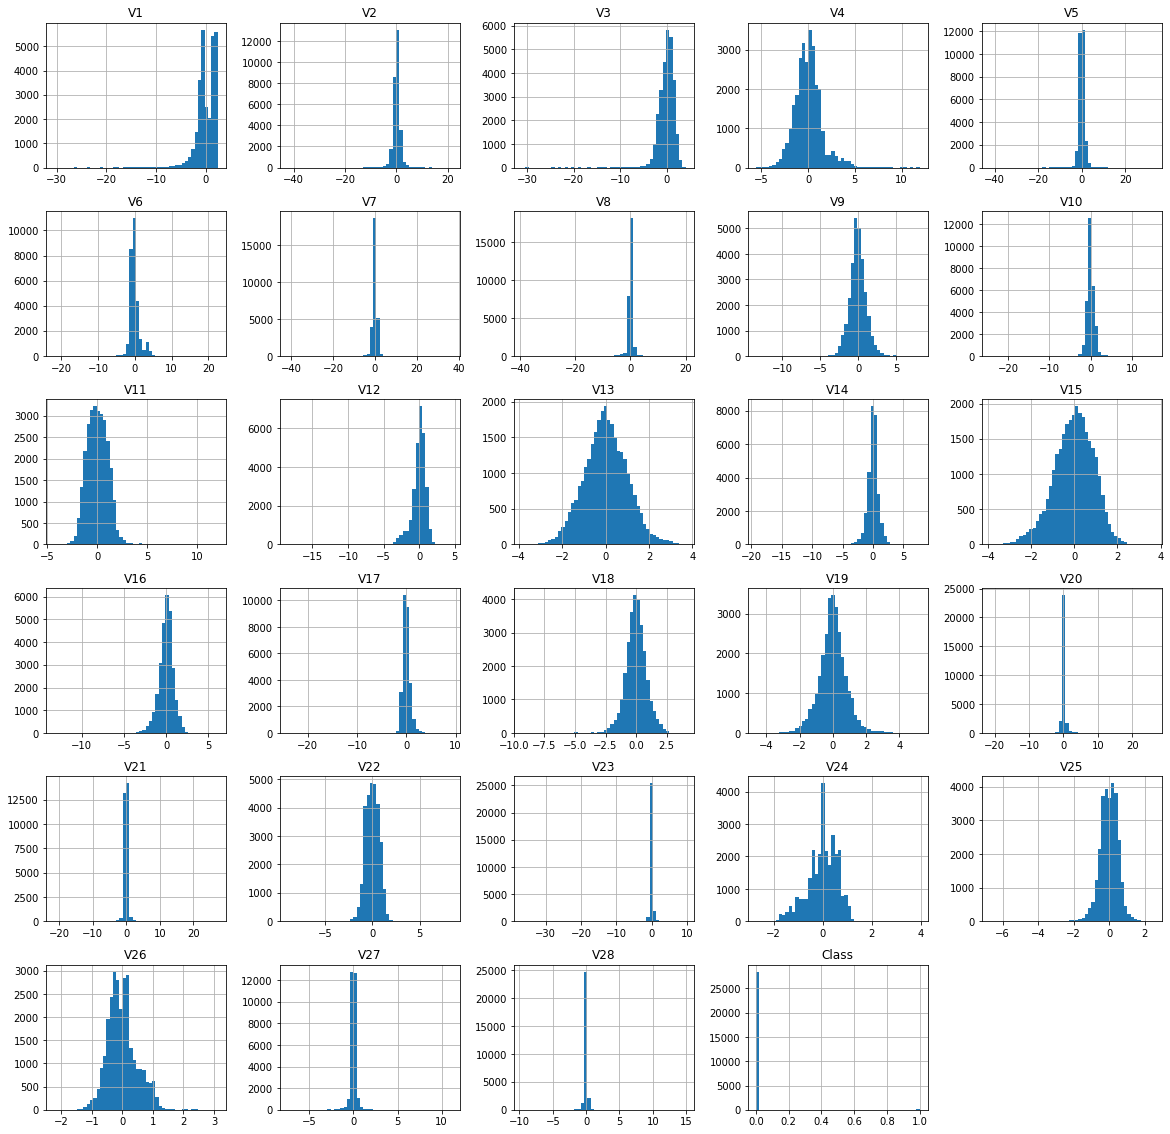

In [5]:
data.hist(bins = 50, figsize = (20,20))
plt.show()

히스토그램을 그려보니 대부분 정규분포를 잘 따르고 있는것을 볼 수 있습니다.<br>
사기거래 탐지같은 경우는 이상치로 사기가 나타날 가능성이 있기 때문에<br>
이상치를 제거하는 전처리는 하지 않는것이 좋을것으로 판단됩니다.
또한 대부분의 변수가 변수의 이름이 아닌 v1,v2과 같이 무엇을 의미하는 변수인지 파악하기 어렵기 때문에 <br>
대략적인 전처리가 어려운것으로 보입니다.

+) 추가로 찾아보니 로지스틱 회귀를 하귀 위해서는 정규화 작업이 필요하다고 하니 정규화 작업을 해줍니다.

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=scaler.fit_transform(data)

In [10]:
from sklearn.model_selection import train_test_split
y=data['Class']
X=data.drop("Class",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1234)

In [11]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_predict=logistic.predict(X_test)

성능지표: 정확도

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict) #너무 높게 나온다....과적합이 의심된다

0.9977336122733612

## 성능개선시도

logistic regression 파라미터 중 <br>class_weight라는 parameter가 가중치에 대한 parameter을 조정할 수 있다고 하여 <br>default=None에서 balenced로 바꾸었습니다.

In [19]:
logistic = LogisticRegression(class_weight='balanced')
logistic.fit(X_train, y_train)
y_predict=logistic.predict(X_test)
accuracy_score(y_test,y_predict)

0.9769874476987448

성능이 내려간것을 볼 수 있습니다...